In [118]:
!pip install geopandas
%pip install ace_tools


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [119]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [120]:
# Load the GeoJSON files
license_gdf = gpd.read_file('license.geojson')
zoning_gdf = gpd.read_file('Zoning.geojson')

In [121]:
# Check the CRS (Coordinate Reference System) and make sure they match
if license_gdf.crs != zoning_gdf.crs:
    zoning_gdf = zoning_gdf.to_crs(license_gdf.crs)

In [122]:
# Perform spatial join to find shops in the specific zoning type "H"
merged_gdf = gpd.sjoin(license_gdf, zoning_gdf, how="inner", predicate='intersects')
merged_gdf['License'].value_counts()

License
LBD7    389
LB      361
LA      171
LD       47
LC       44
WD       36
LBHM     31
AE       21
WA       16
D        14
LBAL      9
WB        8
WC        8
LA-2      7
LM-G      4
DP        2
LMZ       1
LBRL      1
Name: count, dtype: int64

In [123]:
# Find licenses that were dropped (not in merged_gdf)
dropped_licenses = license_gdf[~license_gdf.index.isin(merged_gdf.index)]

# Output the dropped licenses
print("Dropped Licenses:")
print(dropped_licenses)

Dropped Licenses:
                   Trade Name                             Corp Name License  \
71   PATAPSCO VILLAGE LIQUORS                        BAJRANGI, LLC.      LA   
688    PINE RIDGE GOLF COURSE  BALTIMORE MUNICIPAL GOLF CORPORATION    LM-G   

                                        FullAddress  \
71   3434 ANNAPOLIS ROAD, Baltimore, MD, 21227, USA   
688     6131 HILLEN ROAD, Baltimore, MD, 21239, USA   

                                     CleanedAddress BLCC_nonconform  \
71   3434 ANNAPOLIS ROAD, Baltimore, MD, 21227, USA               0   
688     6131 HILLEN ROAD, Baltimore, MD, 21239, USA               0   

                       geometry  
71   POINT (-76.64048 39.24683)  
688  POINT (-76.57732 39.37299)  


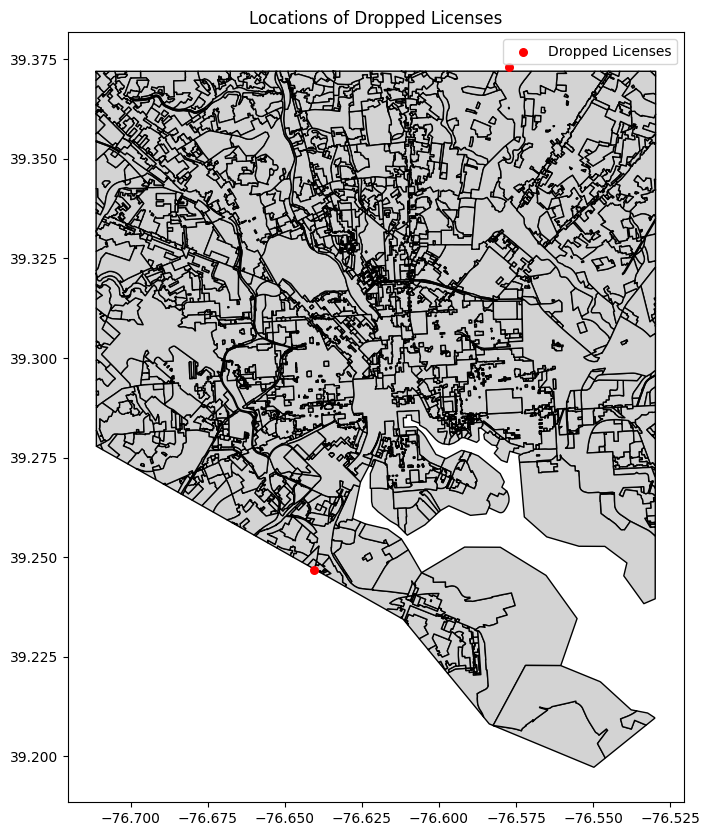

In [124]:
# Plotting dropped licenses
fig, ax = plt.subplots(figsize=(10, 10))
zoning_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
dropped_licenses.plot(ax=ax, color='red', markersize=30, label='Dropped Licenses')
plt.title('Locations of Dropped Licenses')
plt.legend()
plt.show()

In [125]:
merged_gdf.columns
len(merged_gdf)

1170

In [114]:
# OLD CODE FROM TA
# # Save the result to a new GeoJSON file
# output_path = 'shops_in_r5_zone.geojson'
# shops_in_r5_zone.to_file(output_path, driver='GeoJSON')

# # Perform spatial join to find shops in the specific zoning type "H"
# merged_gdf = gpd.sjoin(license_gdf, zoning_gdf, how="inner", predicate='intersects')

# # Filter based on zoning type "H"
# shops_in_r8_zone = merged_gdf[merged_gdf['zoning'] == 'R-8']

# # Save the result to a new GeoJSON file
# output_path = 'shops_in_r8_zone.geojson'
# shops_in_r8_zone.to_file(output_path, driver='GeoJSON')

# # Plot the results
# fig, ax = plt.subplots(figsize=(10, 10))
# zoning_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
# shops_in_r8_zone.plot(ax=ax, color='red', markersize=10)
# plt.title('Shops in R8 Zoning Type')
# plt.show()

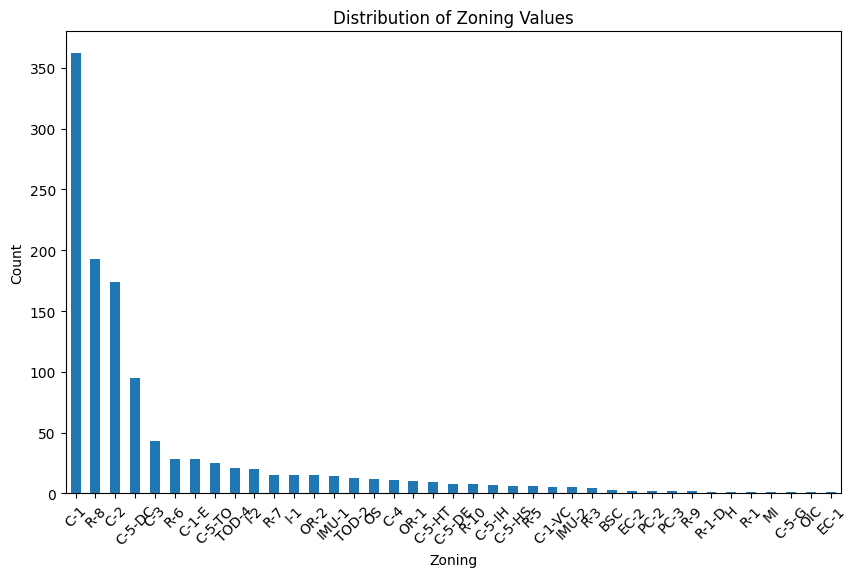

In [126]:
# Count the occurrences of each value in the 'zoning' field
zoning_counts = merged_gdf['zoning'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
zoning_counts.plot(kind='bar')
plt.xlabel('Zoning')
plt.ylabel('Count')
plt.title('Distribution of Zoning Values')
plt.xticks(rotation=45)
plt.show()

In [127]:
zoning_counts

zoning
C-1       362
R-8       193
C-2       174
C-5-DC     95
C-3        43
R-6        28
C-1-E      28
C-5-TO     25
TOD-4      21
I-2        20
R-7        15
I-1        15
OR-2       15
IMU-1      14
TOD-2      13
OS         12
C-4        11
OR-1       10
C-5-HT      9
C-5-DE      8
R-10        8
C-5-IH      7
C-5-HS      6
R-5         6
C-1-VC      5
IMU-2       5
R-3         4
BSC         3
EC-2        2
PC-2        2
PC-3        2
R-9         2
R-1-D       1
H           1
R-1         1
MI          1
C-5-G       1
OIC         1
EC-1        1
Name: count, dtype: int64

In [128]:
# Define the residential zoning codes
residential_zones = ['R-1', 'R-1-D', 'R-3', 'R-5', 'R-6', 'R-7', 'R-8', 'R-9', 'R-10','OR-1','OR-2',]

# Filter the GeoDataFrame for residential zones
residential_outlets = merged_gdf[merged_gdf['zoning'].isin(residential_zones)]

# Convert the filtered GeoDataFrame to a list of dictionaries
residential_outlets_list = residential_outlets.to_dict('records')

# Print the residential outlets list
print(residential_outlets_list[:10])

[{'Trade Name': 'J & M FOOD MARKET', 'Corp Name': 'KANG FAMILY ENTERPRISES, INC.', 'License': 'WA', 'FullAddress': '1601 29TH STREET EAST, Baltimore, MD, 21218, USA', 'CleanedAddress': '1601 EAST 29TH STREET , Baltimore, MD, 21218, USA', 'BLCC_nonconform': '0', 'geometry': <POINT (-76.593 39.324)>, 'index_right': 584, 'fid': 585, 'objectid': 587, 'zoning': 'R-6', 'overlay': ' ', 'label': 'R-6', 'shape_leng': 0, 'url': ' ', 'shape_star': 11177693.5331, 'shape_stle': 20521.8147245, 'SHAPE__Length': 8090.407463355886, 'SHAPE__Area': 1737710.072235629}, {'Trade Name': '29TH STREET TAVERN', 'Corp Name': '398,LLC', 'License': 'LBD7', 'FullAddress': '398 29TH STREET WEST, Baltimore, MD, 21211, USA', 'CleanedAddress': '398 WEST 29TH STREET , Baltimore, MD, 21211, USA', 'BLCC_nonconform': '0', 'geometry': <POINT (-76.624 39.321)>, 'index_right': 887, 'fid': 888, 'objectid': 890, 'zoning': 'R-8', 'overlay': ' ', 'label': 'R-8', 'shape_leng': 0, 'url': ' ', 'shape_star': 216930.763184, 'shape_stl

In [103]:
# Convert the list of dictionaries back to a DataFrame
residential_outlets_df = pd.DataFrame(residential_outlets_list)

# Use value_counts() on the 'License' column
license_counts = residential_outlets_df['License'].value_counts()

# Print the license counts
print(license_counts)

License
LA      32
WA       9
LA-2     2
Name: count, dtype: int64


In [129]:
# Define outlet types subject to zoning
regulated_licensetypes = ['LA','LA-2','WA']

# Filter the GeoDataFrame for residential zones
regulated_outlets = merged_gdf[merged_gdf['License'].isin(regulated_licensetypes)]

# Convert the filtered GeoDataFrame to a list of dictionaries
regulated_outlets_list = regulated_outlets.to_dict('records')

# Print the residential outlets list
print(regulated_outlets_list[:10])

# Create a DataFrame from the list of dictionaries
regulated_outlets_df = pd.DataFrame(regulated_outlets_list)

[{'Trade Name': "ORYE'S LIQUORS", 'Corp Name': 'BEST RVB, INC.', 'License': 'LA', 'FullAddress': '1001 25TH STREET EAST, Baltimore, MD, 21218, USA', 'CleanedAddress': '1001 EAST 25TH STREET , Baltimore, MD, 21218, USA', 'BLCC_nonconform': '0', 'geometry': <POINT (-76.6 39.317)>, 'index_right': 1698, 'fid': 1699, 'objectid': 1707, 'zoning': 'C-4', 'overlay': ' ', 'label': 'C-4', 'shape_leng': 0, 'url': ' ', 'shape_star': 1748785.86713, 'shape_stle': 10812.3796913, 'SHAPE__Length': 4260.396839955169, 'SHAPE__Area': 271821.61456195015}, {'Trade Name': 'J & M FOOD MARKET', 'Corp Name': 'KANG FAMILY ENTERPRISES, INC.', 'License': 'WA', 'FullAddress': '1601 29TH STREET EAST, Baltimore, MD, 21218, USA', 'CleanedAddress': '1601 EAST 29TH STREET , Baltimore, MD, 21218, USA', 'BLCC_nonconform': '0', 'geometry': <POINT (-76.593 39.324)>, 'index_right': 584, 'fid': 585, 'objectid': 587, 'zoning': 'R-6', 'overlay': ' ', 'label': 'R-6', 'shape_leng': 0, 'url': ' ', 'shape_star': 11177693.5331, 'shap

In [130]:
regulated_outlets_df['License'].value_counts()

License
LA      171
WA       16
LA-2      7
Name: count, dtype: int64

In [131]:
#Repeating steps from above
regulated_license_gdf = license_gdf[license_gdf['License'].isin(regulated_licensetypes)]

# Check the CRS (Coordinate Reference System) and make sure they match
if regulated_license_gdf.crs != zoning_gdf.crs:
    zoning_gdf = zoning_gdf.to_crs(regulated_license_gdf.crs)

# Perform spatial join to find shops in the specific zoning type "H"
merged_gdf = gpd.sjoin(regulated_license_gdf, zoning_gdf, how="inner", predicate='intersects')

len(merged_gdf)

194

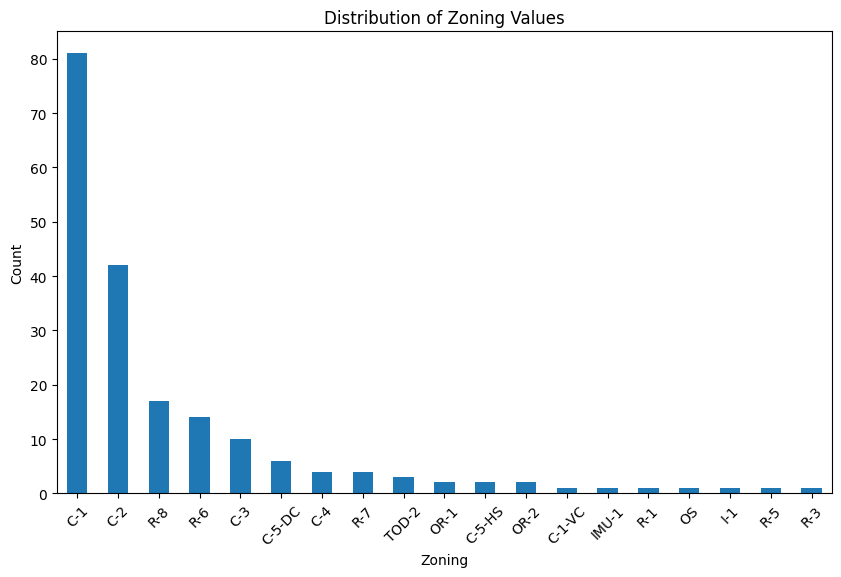

In [132]:
# Count the occurrences of each value in the 'zoning' field
zoning_counts = merged_gdf['zoning'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
zoning_counts.plot(kind='bar')
plt.xlabel('Zoning')
plt.ylabel('Count')
plt.title('Distribution of Zoning Values')
plt.xticks(rotation=45)
plt.show()

In [136]:
residential_outlets.dtypes

Trade Name           object
Corp Name            object
License              object
FullAddress          object
CleanedAddress       object
BLCC_nonconform      object
geometry           geometry
index_right           int64
fid                   int32
objectid              int32
zoning               object
overlay              object
label                object
shape_leng            int32
url                  object
shape_star          float64
shape_stle          float64
SHAPE__Length       float64
SHAPE__Area         float64
dtype: object

In [137]:

# Filter the GeoDataFrame for residential zones
residential_outlets = merged_gdf[merged_gdf['zoning'].isin(residential_zones)]

# Convert the filtered GeoDataFrame to a list of dictionaries
residential_outlets_list = residential_outlets.to_dict('records')

len(residential_outlets_list)

# Output the filtered residential outlets to a CSV file
residential_outlets.to_csv('residential_outlets.csv', index=False)

In [140]:
license_gdf.dtypes

Trade Name           object
Corp Name            object
License              object
FullAddress          object
CleanedAddress       object
BLCC_nonconform      object
geometry           geometry
dtype: object

In [141]:
residential_regulated_outlets.dtypes

Trade Name           object
Corp Name            object
License              object
FullAddress          object
CleanedAddress       object
BLCC_nonconform      object
geometry           geometry
index_right           int64
fid                   int32
objectid              int32
zoning               object
overlay              object
label                object
shape_leng            int32
url                  object
shape_star          float64
shape_stle          float64
SHAPE__Length       float64
SHAPE__Area         float64
dtype: object

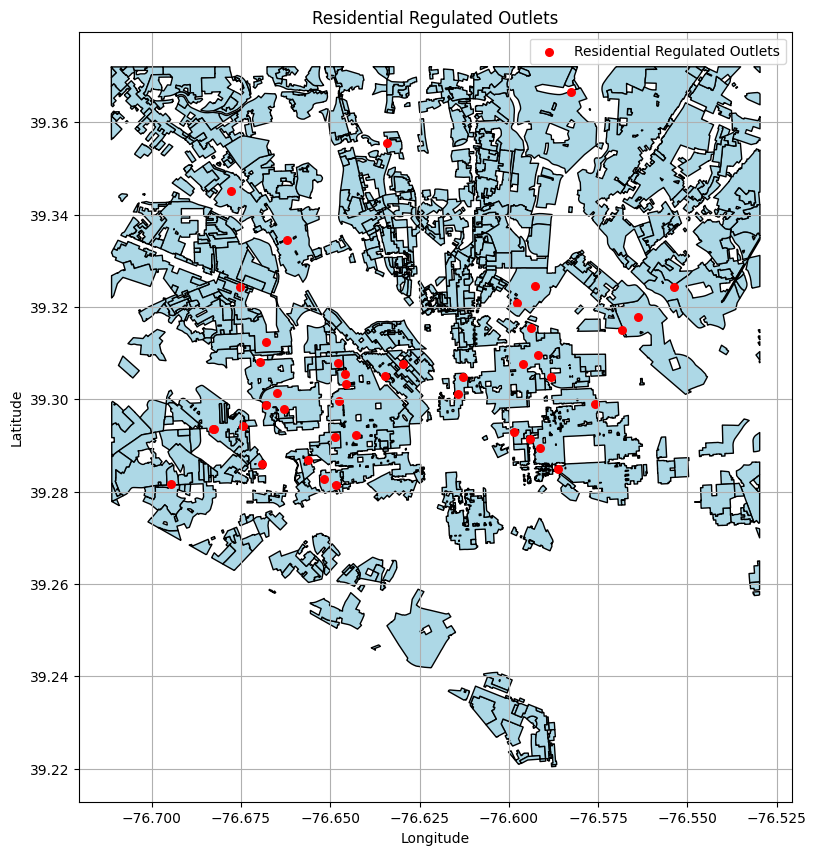

In [133]:
# Filter the GeoDataFrame for residential zones and regulated licenses
residential_regulated_outlets = merged_gdf[
    merged_gdf['zoning'].isin(residential_zones) & 
    merged_gdf['License'].isin(regulated_licensetypes)
]

# Save the filtered GeoDataFrame to a new GeoJSON file
output_path = 'residential_regulated_outlets.geojson'
residential_regulated_outlets.to_file(output_path, driver='GeoJSON')

# Plot the results
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all residential zones for context
zoning_gdf[zoning_gdf['zoning'].isin(residential_zones)].plot(ax=ax, color='lightblue', edgecolor='black')

# Plot residential regulated outlets
residential_regulated_outlets.plot(ax=ax, color='red', markersize=30, label='Residential Regulated Outlets')

# Customize plot
plt.title('Residential Regulated Outlets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()

In [134]:
len(residential_regulated_outlets)

42

In [142]:
# New code to update 'license_gdf'
# Add a new column 'appear_nonconform' with default value 0
license_gdf['appear_nonconform'] = 0

# Create a set of tuples (Trade Name, CleanedAddress) for fast lookup
residential_regulated_set = set(zip(residential_regulated_outlets['Trade Name'], residential_regulated_outlets['CleanedAddress']))

# Update 'appear_nonconform' to 1 for matching rows
license_gdf.loc[license_gdf[['Trade Name', 'CleanedAddress']].apply(tuple, axis=1).isin(residential_regulated_set), 'appear_nonconform'] = 1

# Export the updated DataFrame to a CSV file
license_gdf.to_csv('updated_license_gdf.csv', index=False)

# Print to confirm the update
print(license_gdf.head())

       Trade Name                 Corp Name License  \
0      KONG POCHA            SOY BEAN, INC.      LB   
1          CLAVEL               HARLAN, INC      LB   
2     W.C. HARLAN  400 W. 23RD STREET, INC.      LD   
3  NEW TERRA CAFE       NEW TERRA CAFE, LLC      LB   
4  ORYE'S LIQUORS            BEST RVB, INC.      LA   

                                         FullAddress  \
0  12-16 20TH STREET WEST, Baltimore, MD, 21218, USA   
1  225-27 23RD STREET WEST, Baltimore, MD, 21211,...   
2    400 23RD STREET WEST, Baltimore, MD, 21211, USA   
3    101 25TH STREET EAST, Baltimore, MD, 21218, USA   
4   1001 25TH STREET EAST, Baltimore, MD, 21218, USA   

                                      CleanedAddress BLCC_nonconform  \
0    12 WEST 20TH STREET , Baltimore, MD, 21218, USA               0   
1   225 WEST 23RD STREET , Baltimore, MD, 21211, USA               0   
2   400 WEST 23RD STREET , Baltimore, MD, 21211, USA               0   
3   101 EAST 25TH STREET , Baltimore, MD, 21